In [ ]:
! pip install pydlm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 1.5 MB/s eta 0:00:00


In [ ]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import RobustScaler
from keras.models import Sequential
from pydlm import dlm, trend, seasonality, dynamic
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
df = pd.read_csv('/content/USDT-USD.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1.01255,1.01536,1.001530,1.007280,1.007280,1.685300e+09
2018-01-02,1.00574,1.00988,0.993250,1.004900,1.004900,2.635860e+09
2018-01-03,1.00660,1.02328,1.002640,1.013440,1.013440,2.471690e+09
2018-01-04,1.01320,1.01618,0.993822,1.002530,1.002530,3.200130e+09
2018-01-05,1.00175,1.00501,0.985915,0.998634,0.998634,3.096620e+09


In [ ]:
# Đọc file csv và gắng index với giá Close
df = df[['Close']]
df = df.dropna() # Drop missing values
# df = df.reset_index(drop=True) # Reset the index

In [ ]:
# # Scaler data
scaler=RobustScaler()
df_new = scaler.fit_transform(df)

In [ ]:
# Define the lengths of train, validation, and test sets
train_size = int(0.6 * len(df_new))
test_size = int(0.2 * len(df_new))
val_size = len(df_new) - train_size - test_size

# Split the dataset into train, validation, and test sets
train_data = df_new[:train_size]
test_data = df_new[train_size:train_size + test_size]
val_data = df_new[train_size + test_size:]


In [ ]:
# construct the base
myDLM = dlm(train_data)
# adding model components
# add a first-order trend (linear trending) with prior covariance 1.0
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)
# A seasonality
seasonal52 = seasonality(period=52, discount=0.99, name='seasonal52', w=10)
myDLM = myDLM + linear_trend + seasonal52


In [ ]:
myDLM.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
# predict test
y_test_pred = myDLM.predictN(N=len(test_data))
y_test_pred = y_test_pred[0]
y_test_pred = np.array(y_test_pred).reshape(-1,1)

In [ ]:
# predict val
y_val_pred = myDLM.predictN(N=len(val_data))
y_val_pred = y_val_pred[0]
y_val_pred = np.array(y_val_pred).reshape(-1,1)

In [ ]:
# predict 30 days
y_pred_30days = myDLM.predictN(N=30)
y_pred_30days= y_pred_30days[0]
y_pred_30days = np.array(y_pred_30days).reshape(-1,1)

In [ ]:
print(y_pred_30days)

[[ 0.15512554]
 [ 0.50452731]
 [ 0.03771089]
 [-0.03954894]
 [ 0.17658066]
 [ 0.28633689]
 [-0.18207103]
 [ 0.16054918]
 [-0.12898843]
 [ 0.42908129]
 [ 0.2861608 ]
 [ 0.20182611]
 [-0.22726986]
 [ 0.17136358]
 [-0.04448698]
 [ 0.00759309]
 [ 0.36461808]
 [ 0.00991492]
 [ 0.00871417]
 [-0.08028286]
 [ 0.19136817]
 [ 0.19190884]
 [-0.00479705]
 [ 0.15035609]
 [-0.19318273]
 [-0.12156909]
 [-0.03530839]
 [-0.12518776]
 [-0.1550965 ]
 [-0.17460141]]


**Đánh giá trên tập Test với tỉ lệ 6:2:2**

In [ ]:
mse = mean_squared_error(test_data, y_test_pred)
rmse =np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = mean_absolute_percentage_error(test_data, y_test_pred) * 100

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.2701515683392996
RMSE: 0.5197610685106182
MAE: 0.37618552514857956
MAPE: 1554.5060487210196


**Đánh giá trên tập Test với tỉ lệ 7:2:1**

In [ ]:
mse = mean_squared_error(test_data, y_test_pred)
rmse =np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = mean_absolute_percentage_error(test_data, y_test_pred)*100

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.135968634643086
RMSE: 0.3687392502068176
MAE: 0.3143547450191646
MAPE: 1362.2778807536797


In [ ]:
from datetime import datetime, timedelta
start_date = datetime(2023, 4, 26)
end_date = datetime(2023, 5, 25)
dates = pd.date_range(start=start_date, end=end_date, freq='D')

**Nếu đang làm tỉ lệ 7:2:1 thì chạy cái này trước khi vẽ biểu đồ**

In [ ]:
train_size1 = int(0.7 * len(df))
test_size1 = int(0.2 * len(df))
val_size1 = len(df) - train_size - test_size

train_data1 = df[:train_size]
test_data1 = df[train_size:train_size+test_size]
val_data1 = df[train_size+test_size:]

 **Nếu đang làm tỉ lệ 6:2:2 thì chạy cái này trước khi vẽ biểu đồ**

In [ ]:
train_size2 = int(0.6 * len(df))
test_size2 = int(0.2 * len(df))
val_size2 = len(df) - train_size - test_size

train_data2 = df[:train_size]
test_data2 = df[train_size:train_size+test_size]
val_data2 = df[train_size+test_size:]

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST VÀ Validate tỉ lệ 6:2:2**


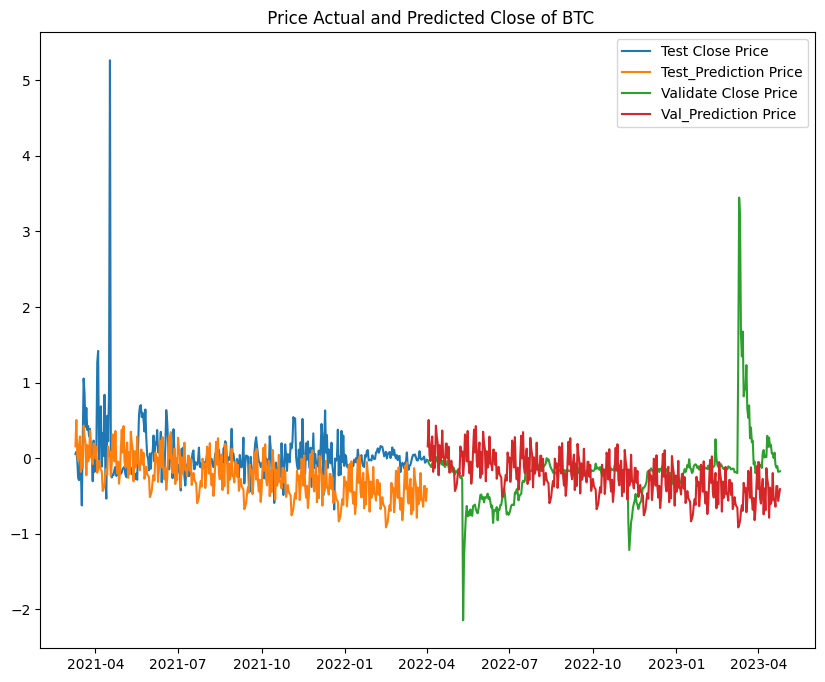

In [ ]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.title(' Price Actual and Predicted Close of BTC')
plt.plot(test_data2.index, test_data , label = 'Test Close Price')
plt.plot(test_data2.index, y_test_pred , label = 'Test_Prediction Price')
plt.plot(val_data2.index, val_data, label = 'Validate Close Price')
plt.plot(val_data2.index, y_val_pred, label = 'Val_Prediction Price')
plt.legend()
plt.show()

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST VÀ Validate tỉ lệ 7:2:1**


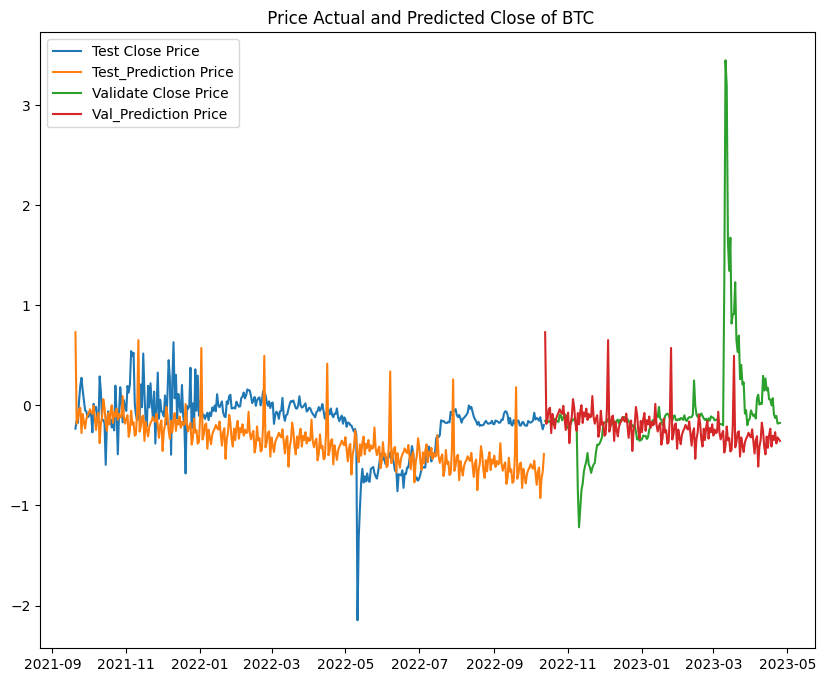

In [ ]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.title(' Price Actual and Predicted Close of BTC')
plt.plot(test_data1.index, test_data , label = 'Test Close Price')
plt.plot(test_data1.index, y_test_pred , label = 'Test_Prediction Price')
plt.plot(val_data1.index, val_data, label = 'Validate Close Price')
plt.plot(val_data1.index, y_val_pred, label = 'Val_Prediction Price')
plt.legend()
plt.show()

**Biểu đồ dự đoán 30 ngày với tỉ lệ 7:2:1**

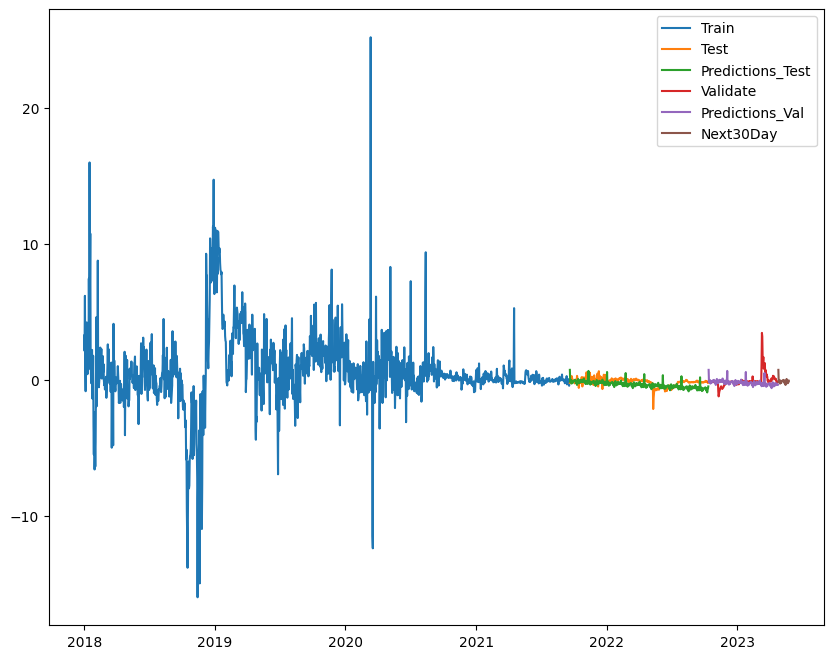

In [ ]:
# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.plot(train_data1.index, train_data)
plt.plot(test_data1.index, test_data)
plt.plot(test_data1.index, y_test_pred)
plt.plot(val_data1.index, val_data)
plt.plot(val_data1.index, y_val_pred)
plt.plot(dates,y_pred_30days)
plt.legend(['Train', 'Test', 'Predictions_Test','Validate','Predictions_Val','Next30Day'])
plt.show()

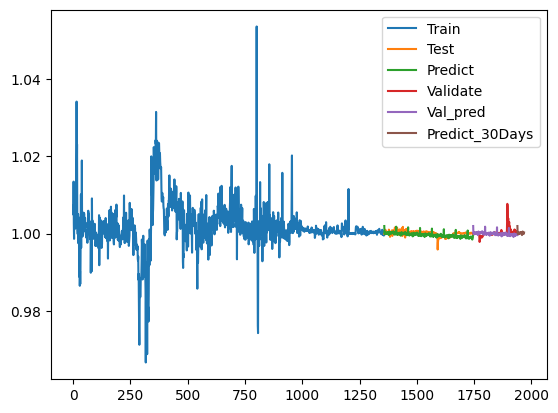

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_test_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=len(df), step=1)
plt.plot(val_data_index,scaler.inverse_transform(y_val_pred))

prediect_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(y_pred_30days))

plt.legend(['Train','Test','Predict','Validate','Val_pred','Predict_30Days'])
plt.show()

**Biểu đồ dự đoán 30 ngày với tỉ lệ 6:2:2**

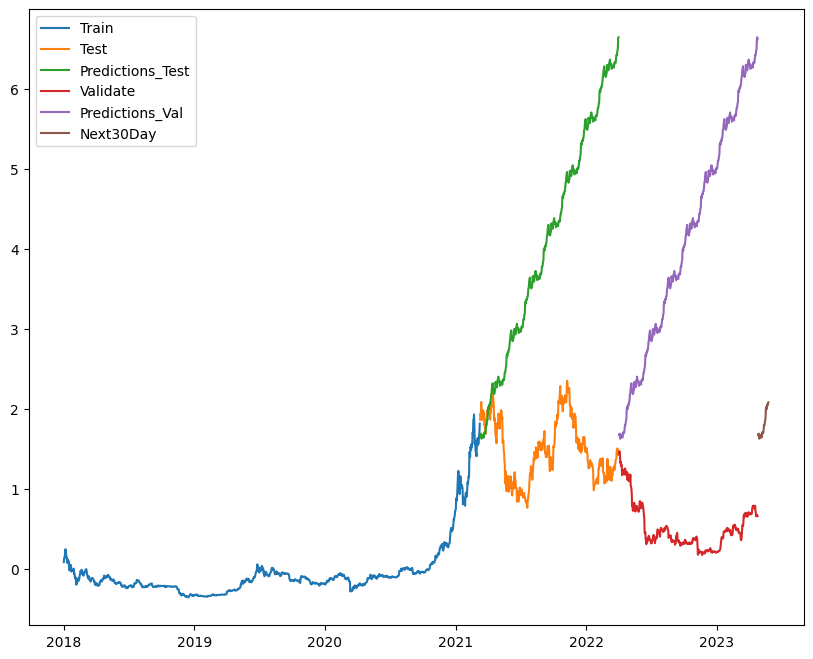

In [ ]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.plot(train_data2.index, train_data)
plt.plot(test_data2.index, test_data)
plt.plot(test_data2.index, y_test_pred)
plt.plot(val_data2.index, val_data)
plt.plot(val_data2.index, y_val_pred)
plt.plot(dates,y_pred_30days)
plt.legend(['Train', 'Test', 'Predictions_Test','Validate','Predictions_Val','Next30Day'])
plt.show()